In [2]:
import ipywidgets as widgets
import random
import pickle
import glob
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
from pathlib import Path
import io
from PIL import Image

In [3]:
DIRECTORY = "dataset"

CATEGORIES = ["Gråspurv", "Grønnfink", "Grønnsisik", "Kråke", "Nøtteskrike", "Pilfink", "Fossekall"]

In [6]:
# Her henter vi hvert treningsbilde inn i en array og setter dem inn i data[] sammen med svaret på hilket dyr det er. 
# Her opplevde vi noe problemer med at enkelte bilder bli lest som null når det ble hentet, så vi må sjekke at vi ikke får null verdi på bilden.
# De som får null verdi hopper vi over.


import cv2 as cv
import os

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv.imread(img_path)
        if img_arr is None:
            print('Error: could not read image at', img_path)
        else:
            print("It worked")
            #data.append([img_arr, label])

Error: could not read image at dataset\Gråspurv\100117.png
Error: could not read image at dataset\Gråspurv\100530.png
Error: could not read image at dataset\Gråspurv\100531.png
Error: could not read image at dataset\Gråspurv\104649.png
Error: could not read image at dataset\Gråspurv\105519.png
Error: could not read image at dataset\Gråspurv\106175.png
Error: could not read image at dataset\Gråspurv\107146.png
Error: could not read image at dataset\Gråspurv\107547.png
Error: could not read image at dataset\Gråspurv\108385.png
Error: could not read image at dataset\Gråspurv\112666.png
Error: could not read image at dataset\Gråspurv\114522.png
Error: could not read image at dataset\Gråspurv\116041.png
Error: could not read image at dataset\Gråspurv\127677.png
Error: could not read image at dataset\Gråspurv\131227.png
Error: could not read image at dataset\Gråspurv\131299.png
Error: could not read image at dataset\Gråspurv\131300.png
Error: could not read image at dataset\Gråspurv\132427.p

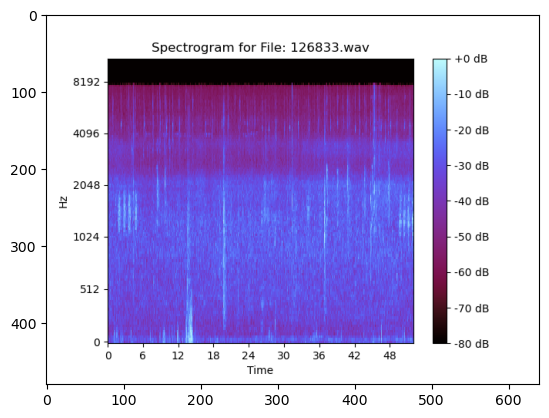

In [19]:
plt.imshow(data[1][0])
# Eksempel på ett av bildene i data[].

In [20]:
random.shuffle(data)
# Her tar vi å stokker om slik at vi ikke får samme type dyr gruppet sammen når vi skal trene modellen.

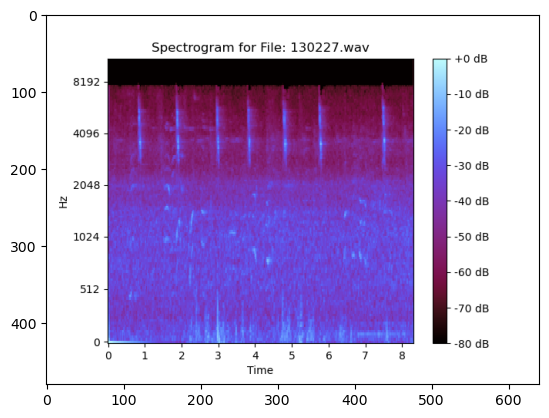

In [21]:
plt.imshow(data[1][0])
# Her henter vi et bilde fra data[] som er på akkurat samme plass som det bildet vi hentet tidligere, som vi kan se er bildet annerleds enn istad.
# Det er et bevis på at shuffle metoden fungerte!

In [12]:
X = []
Y = []

for features, labels in data:
    X.append(features)
    Y.append(labels)
# Splitter treningsdataen for å forbedrede den til modell-trening.

In [13]:
X = np.array(X)
Y = np.array(Y)
# Setter X og Y verdiene inn i en array.

C:\Users\antont\AppData\Local\Temp\ipykernel_4988\2929271042.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [14]:
X = X/255
# Deler treningsdataen på 255 fordi hver piksel kan ha en verdi fra 0 til 255. Ved å dele på 255 vil vi stadardisere dataen, 
# slik at den blir mellom 0 til 1.

In [15]:
X.shape
# 1725 er antall bilder vi har i X, (300, 300) er begge størrelsen på bildene, og 3 står for hvert fargelag (r = rød, g = grønn, b = blå)

(443,)

In [16]:
import fastai